# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# According to AskBCS, this should be a left join, but right join provided me the table that was closest to the example
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [2]:
# Checking the number of mice.
number_of_mice = mouse_data["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data[mouse_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice_unique = duplicate_mice["Mouse ID"].unique()
duplicate_mice_unique

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_data[mouse_data["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Note: This step appears to be removing the duplicate mouse entirely from the dataset
# Rather than just removing the duplicate rows
clean_mouse_data = mouse_data[mouse_data["Mouse ID"] != "g989"]
clean_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = clean_mouse_data["Mouse ID"].nunique()
clean_number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_by_drug = clean_mouse_data.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = grouped_by_drug["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_by_drug["Tumor Volume (mm3)"].median()
variance_tumor_volume = grouped_by_drug["Tumor Volume (mm3)"].var()
std_tumor_volume = grouped_by_drug["Tumor Volume (mm3)"].std()
sem_tumor_volume = grouped_by_drug["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                                "Median Tumor Volume": median_tumor_volume,
                                "Tumor Volume Variance": variance_tumor_volume,
                                "Tumor Volume SD": std_tumor_volume,
                                "Tumor Volume SEM": sem_tumor_volume})
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume SD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grouped_by_drug["Tumor Volume (mm3)"]

## Bar and Pie Charts

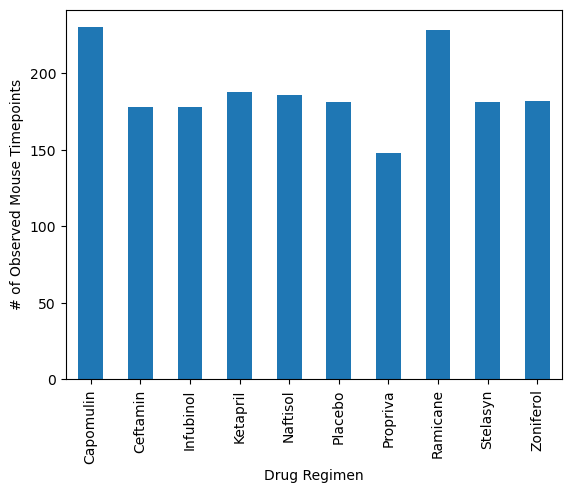

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# We already have the data grouped by drug, so we need to find out the number of rows in each group
count_by_drug = grouped_by_drug["Mouse ID"].count()
count_chart = count_by_drug.plot(kind="bar", ylabel="# of Observed Mouse Timepoints", xlabel="Drug Regimen")


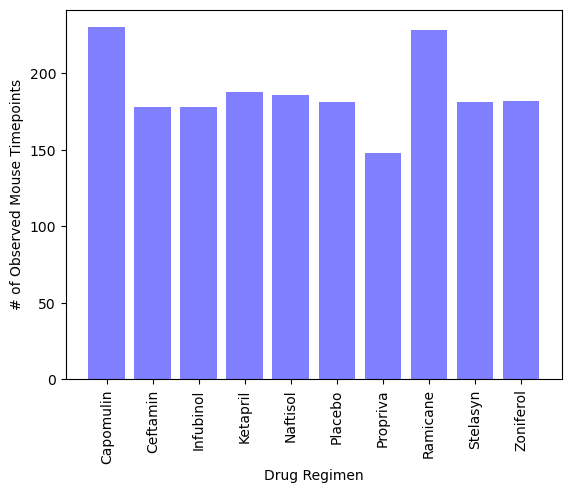

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Create values for the x axis
x_axis_drug = np.arange(len(count_by_drug))

# Create values for the y axis
y_axis_drug = count_by_drug.values

# Create a list of the drug names
drug_names = count_by_drug.index

# Create the ticks for our bar chart's x axis
tick_locations_drug = [value for value in x_axis_drug]

# Create the bar chart
plt.bar(x_axis_drug, y_axis_drug, color="b", alpha=0.5, align="center")

# Add the ticks to the x axis
plt.xticks(tick_locations_drug, drug_names, rotation="vertical")

# Create labels for the x and y axes
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Show the chart
plt.show()

<Axes: ylabel='Sex'>

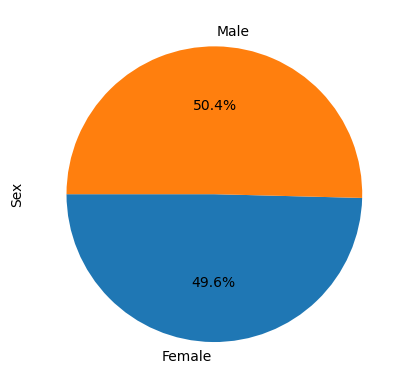

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Sex will not change across timepoints, so we need to know the sex of each unique ID
# Capture sex at timepoint 0 (the first timepoint)
first_timepoint = clean_mouse_data[clean_mouse_data["Timepoint"] == 0].copy()

# Only get our variables of interest
first_timepoint = first_timepoint[['Sex']]
# first_timepoint

# Create a dataframe with the information we need
# sex_of_mice_df = ((first_timepoint['Sex'].value_counts() / first_timepoint['Sex'].count()) * 100).map('{:.1f}%'.format)
# sex_of_mice_df

# Note 1: This does not include the duplicate mouse that we threw out earlier in the code because 
# this pie chart should represent the statistics that we pulled
# The excluded mouse is no longer part of the results and therefore is not included in descriptive charts

# Note 2: In our dataset, our subjects (the mice) are showing up multiple times because each timepoint is a row in the data
# Our goal is to find out the sex of the mice used in the study
# Including all the timepoints would artificially inflate the number of mice in the study

# Create the pie chart
# This method puts the code in a line, rather than making another dataframe
first_timepoint.groupby(['Sex']).value_counts().plot(kind='pie', ylabel='Sex', startangle=180, autopct='%1.1f%%', legend=False)

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels_sex = clean_mouse_data['Sex'].unique()
sizes_sex = clean_mouse_data['Sex'].value_counts()

# Create a column that is percentages of the total
percent_sex = clean_mouse_data['Sex'].value_counts() / clean_mouse_data["Mouse ID"].nunique()

# Format the percentages
percent_sex = percent_sex.map("{:.1%}".format)

# Labels for the sections of our pie chart were already created above before they were merged into a dataframe
# labels_sex
# sizes_sex

# The values of each section of the pie chart


# The colors of each section of the pie chart


# Create the pie chart based upon the values above



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
